# Analysis of Students Performance in Exams

### The dataset is about the students' scores in math, reading, and writing exams, and some factors that may affect their performance, including students' gender, race, parental level of education, getting a standard or free/reduced lunch meal, and whether they completed the test preparation course or not. 

### Questions I intend to answer:
1. which subject did students perform best?
2. what are the major factors affecting students' testing scores based on the average total socre?
3. Is there any relationship between two factors affecting students' performance?

### The link to download the dataset is https://www.kaggle.com/spscientist/students-performance-in-exams#StudentsPerformance.csv

## Data Extraction

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
stu_performance = pd.read_csv('/Users/yizhang/Downloads/StudentsPerformance.csv')
stu_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [69]:
print("Statistical Info:")
print(stu_performance.describe())

Statistical Info:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [14]:
print("Basic Info:")
print(stu_performance.info())
print("The Size of Dataframe:", stu_performance.shape)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
The Size of Dataframe: (1000, 8)


## Data Cleanup

In [17]:
print("Check if there are any missing values:")
print(stu_performance.isnull().sum())

Check if there are any missing values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


We can conclude from the above numbers that there are no missing values in this data frame. From my perspective, I will rename the race/ethnicity as race because I think race is more representative. Also, I will remove the columns for lunch since I will focus more on students' gender, race, parental level of education, and test preparation course.

In [33]:
no_lunch_column = stu_performance.drop(stu_performance.columns[[3]], axis=1)
new_stu_per = no_lunch_column.rename(columns={'race/ethnicity': 'race'})
new_stu_per.head()

,gender,race,parental level of education,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75


In [39]:
new_stu_per.columns=['Gender','Race', 'Parental Level of Education','Test Prep', 'Math Score','Reading Score','Writing Score']
new_stu_per.head()

,Gender,Race,Parental Level of Education,Test Prep,Math Score,Reading Score,Writing Score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75


## Data Analysis with Visualization and Descriptive/Predictive Analytics
1. Which subject has a higher pass rate
2. Check the average of total score for some factors
3. The relationship between two factors influencing students performance


#### Which subject has a higher pass rate

In [117]:
pass_grade=40
print("The number of students passing math exam:")
new_stu_per['Math_Pass'] = np.where(new_stu_per['Math Score'] < pass_grade ,'F','P')
new_stu_per['Math_Pass'].value_counts()

The number of students passing math exam:


P    960
F     40
Name: Math_Pass, dtype: int64

In [118]:
print("The number of students passing reading exam:")
new_stu_per['Reading_Pass'] = np.where(new_stu_per['Reading Score'] < pass_grade ,'F','P')
new_stu_per['Reading_Pass'].value_counts()

The number of students passing reading exam:


P    974
F     26
Name: Reading_Pass, dtype: int64

In [119]:
print("The number of students passing writing exam:")
new_stu_per['Writing_Pass'] = np.where(new_stu_per['Writing Score'] < pass_grade ,'F','P')
new_stu_per['Writing_Pass'].value_counts()

The number of students passing writing exam:


P    968
F     32
Name: Writing_Pass, dtype: int64

As seen from the above numbers, there are more students passing the reading exam than passing the math and writing exams.

#### Check the grade letter for students performance
 Grading Scale:
 Above 80 = A
   70-80 = B
   60-70 = C
   50-60 = D
   40-50 = E
 Below 40 = F

In [141]:
new_stu_per['Pass_Status'] = np.where(new_stu_per['Total Score']<pass_grade,'F','P')
new_stu_per['Pass_Status'].value_counts()

P    970
F     30
Name: Pass_Status, dtype: int64

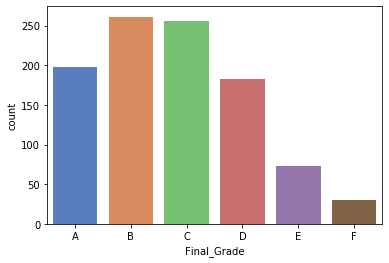

In [146]:

def grades(Pass_Grade,Total_Score):
    if Pass_Grade == 'F':
        return 'F'
    if Total_Score >=80:
        return 'A'
    if Total_Score >=70:
        return 'B'
    if Total_Score >=60:
        return 'C'
    if Total_Score >=50:
        return 'D'
    if Total_Score >=40:
        return 'E'
new_stu_per['Final_Grade'] =new_stu_per.apply(lambda x : grades(x['Pass_Status'] ,x['Total Score']) ,axis =1)
sns.countplot(x="Final_Grade", data = new_stu_per, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

Based on the above graph, most of the students get a "B" or "C" on average in three exams and there are still some students failing to pass the exams.

#### Check the average of total score for each factor

In [54]:
new_stu_per['Total Score']=(new_stu_per['Math Score']+new_stu_per['Reading Score']+new_stu_per['Writing Score'])/3
new_stu_per['Total Score'].head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: Total Score, dtype: float64

In [45]:
new_stu_per.groupby(['Gender']).mean()

,Math Score,Reading Score,Writing Score,Total Score
Gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [46]:
new_stu_per.groupby(['Race']).mean()

,Math Score,Reading Score,Writing Score,Total Score
Race,,,,
group A,61.629213,64.674157,62.674157,62.992509
group B,63.452632,67.352632,65.600000,65.468421
group C,64.463950,69.103448,67.827586,67.131661
group D,67.362595,70.030534,70.145038,69.179389
group E,73.821429,73.028571,71.407143,72.752381


In [47]:
new_stu_per.groupby(['Parental Level of Education']).mean()

,Math Score,Reading Score,Writing Score,Total Score
Parental Level of Education,,,,
associate's degree,67.882883,70.927928,69.896396,69.569069
bachelor's degree,69.389831,73.000000,73.381356,71.923729
high school,62.137755,64.704082,62.448980,63.096939
master's degree,69.745763,75.372881,75.677966,73.598870
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007


In [48]:
new_stu_per.groupby(['Test Prep']).mean()

,Math Score,Reading Score,Writing Score,Total Score
Test Prep,,,,
completed,69.695531,73.893855,74.418994,72.669460
none,64.077882,66.534268,64.504673,65.038941


Text(0.5, 1.0, 'Total Score by Gender')

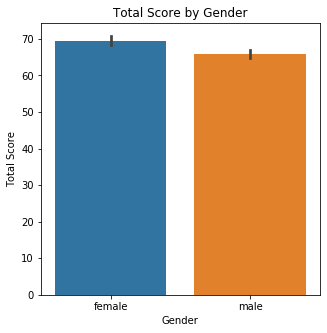

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(5,5))
sns.barplot(x='Gender', y='Total Score', data = new_stu_per).set_title('Total Score by Gender')

Text(0.5, 1.0, 'Total Score by Race')

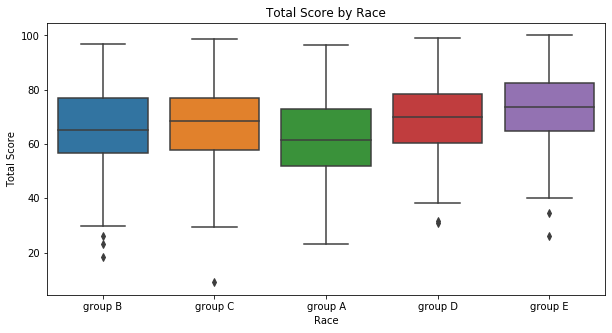

In [63]:
plt.figure(figsize =(10,5))
sns.boxplot(x='Race', y='Total Score', data = new_stu_per, ).set_title('Total Score by Race')

Text(0.5, 1.0, 'Total Score by Parental Education')

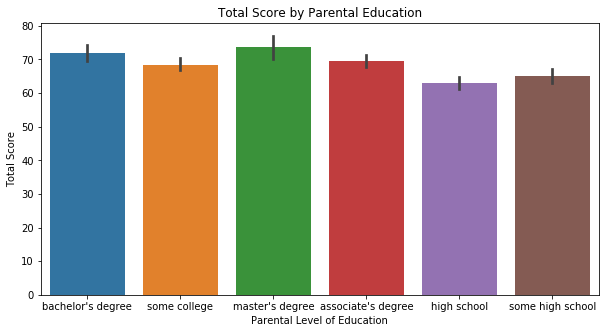

In [68]:
plt.figure(figsize =(10,5))
sns.barplot(x='Parental Level of Education', y='Total Score', data = new_stu_per,).set_title('Total Score by Parental Education')

Text(0.5, 1.0, 'Total Score by Test Preparation')

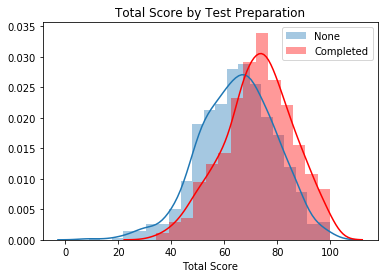

In [121]:
import statsmodels
import statsmodels.stats as stats
no_testprep = new_stu_per.loc[new_stu_per['Test Prep'] == 'none', 'Total Score']
com_testprep = new_stu_per.loc[new_stu_per['Test Prep'] == 'completed', 'Total Score']
sns.distplot(no_testprep)
sns.distplot(com_testprep,color="red")
plt.legend(['None','Completed'])
plt.title("Total Score by Test Preparation")

In [125]:
from statsmodels.stats import weightstats as weightstats
weightstats.ttest_ind(com_testprep, no_testprep, alternative='larger')

(8.39094444348259, 8.168901017961813e-17, 998.0)

In [126]:
weightstats.ztest(com_testprep, no_testprep)

(8.390944443482592, 4.8225220298328115e-17)

As seen above, female students, students who is from group E, students whose parents have a master's degree, and students who completed the test preparation course have a higher average total score. And look at the graph of total score by test preparation, the distribution of completed test preparation course is more symmetric.

#### The relationship between any two factors

Text(0.5, 1, 'The Relationship between Race and Test Prep')

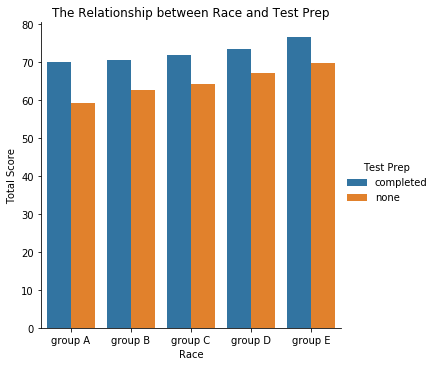

In [84]:
race_testprep = new_stu_per.groupby(['Race','Test Prep']).mean().reset_index()
sns.catplot(x='Race', y='Total Score', hue='Test Prep', data = race_testprep,kind='bar')
plt.title('The Relationship between Race and Test Prep')

According to the above analysis, students from group E have the highest average total score while students from group A have the lowest average total score, regardless of whether they completed the test preparation course or not.

Text(0.5, 1, 'The Relationship between Test Preparation and Parental Level of Education')

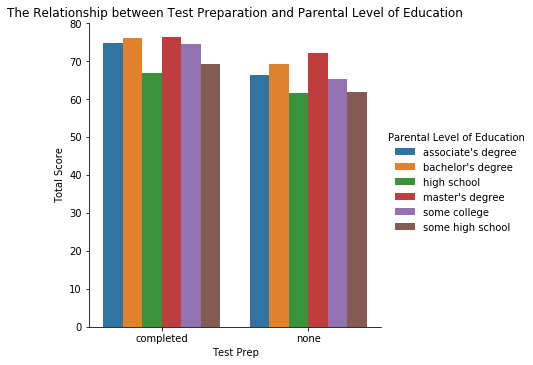

In [97]:
testprep_parE = new_stu_per.groupby(['Test Prep','Parental Level of Education']).mean().reset_index()
sns.catplot(x='Test Prep', y='Total Score', hue='Parental Level of Education', data=testprep_parE, kind='bar')
plt.title("The Relationship between Test Preparation and Parental Level of Education")

Students who completed the test preparation course have a higher average total score no matter what kind of parental level of education.

## Conclusion

Based on the analysis, the passing rate is higher in the reading exam compared with math and writing exam. Moreover, most of the students will get a "B" or "C" on average in three exams. What's more, the effects those factors have on the students performance is clear, which shows that female students, students who is from group E, students whose parents have a master's degree, and students who completed the test preparation course will have a higher average total score. Also, I mainly analyze the relationship between Race and Test Preparation and between Test Preparation and Parental Level of Education. If the students are from the group E, they may have the highest average total score regardless of whether completing the test preparation course or not. In general, test preparation course can help students achieve greater grades, which states that students can have a higher average total score if completing the test preparation course no matter what kind of parental level of education.
